# **Module**: PCA-based Multivariate Statistical Process Monitoring
## **Lecture**: PCA: Industrial Case Study
### *Topic*:  Fault Isolation

In [2]:
# import required packages
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

In [3]:
# ==================================================================================
#                        Read and explore dataset
# ==================================================================================

In [4]:
#%% fetch data
data = pd.read_excel('proc1a.xlsx',skiprows=1,usecols='C:AI')

print("\n First few rows:")
print(data.head())


 First few rows:
   x1in  x2in  x3in  x4in  x5in  x6in  x7in    y1    y2    y3  ...  xgnx  \
0  0.47 -1.66 -0.19  1.94  0.07 -4.54 -0.09 -1.13  0.62  0.24  ... -0.13   
1  0.05 -0.83  0.04  0.75  0.25 -0.02 -0.60 -0.89  0.68  0.14  ... -0.17   
2 -0.58 -0.21 -0.08  0.89  0.34  0.12 -0.86 -0.81  0.77  0.12  ...  0.07   
3 -0.90  0.11  0.16  1.43  0.45  0.13 -0.41 -0.70  0.69  0.21  ...  0.17   
4 -0.78 -0.33 -0.34  1.51  0.50 -0.01 -0.31 -0.38  0.91  0.07  ...  0.14   

   xhnx  xinx  xjnx  xknx  xlnx  xmen  xnen  xoen  xpen  
0 -0.12  0.24  0.22 -0.01  0.27 -0.21  0.38  0.09 -0.11  
1 -0.11  0.22  0.05 -0.08  0.18 -0.33  0.34 -0.04 -0.33  
2 -0.17  0.20 -0.02 -0.13  0.31 -0.41  0.22  0.04 -0.01  
3 -0.01  0.29  0.07  0.01  0.30 -0.49  0.30 -0.22  0.00  
4 -0.05  0.26  0.06 -0.04  0.33 -0.58  0.23 -0.27 -0.28  

[5 rows x 33 columns]


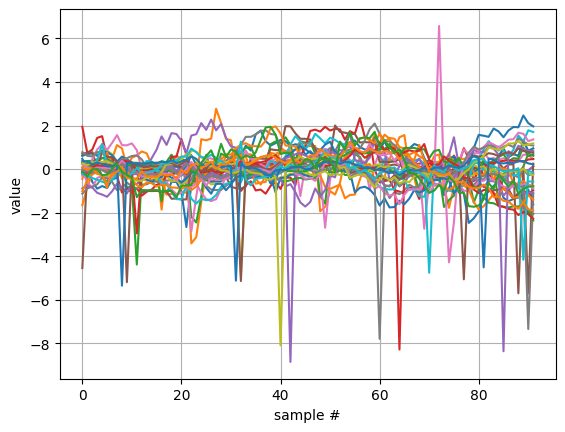

In [5]:
#%% visualize complete data
plt.figure()
plt.plot(data)
plt.ylabel('value'), plt.xlabel('sample #')
plt.grid()

In [6]:
# ==================================================================================
#                        Fit PCA model 
# ==================================================================================

In [7]:
# separate train data
data_train = data.iloc[0:69,]
           
# scale data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)
           
# fit PCA (retaining all PCs by default)
pca = PCA()
scores_train = pca.fit_transform(data_train_normal)

print('Shape of scores_train matrix: ', scores_train.shape)

Shape of scores_train matrix:  (69, 33)


##### we have not accomplished any dimensionality reduction yet. PCA has simply provided us an uncorrelated dataset in scores_train. To confirm this, we can compute a heatmap of correlation coefficients among the columns of score_train. 

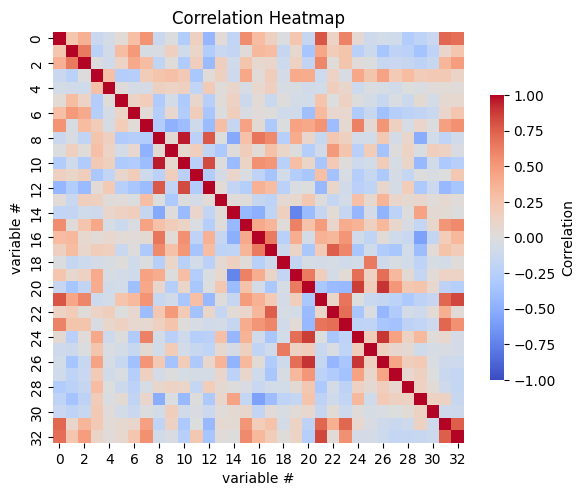

In [8]:
# heatmap of correlation coefficients among original scaled variables
import seaborn as sns

# Calculate correlation matrix
correlation_matrix_originalVariables = np.corrcoef(data_train_normal.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_originalVariables, 
            cmap='coolwarm',  # Color scheme (red for positive, blue for negative correlations)
            vmin=-1,  # Minimum correlation value
            vmax=1,   # Maximum correlation value
            center=0, # Center the colormap at 0
            square=True, # Make the plot square-shaped
            cbar_kws={
                'shrink': 0.5,  # height
                'label': 'Correlation',  # add label
            }) # Format correlation values to 2 decimal places

plt.xlabel('variable #'), plt.ylabel('variable #')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

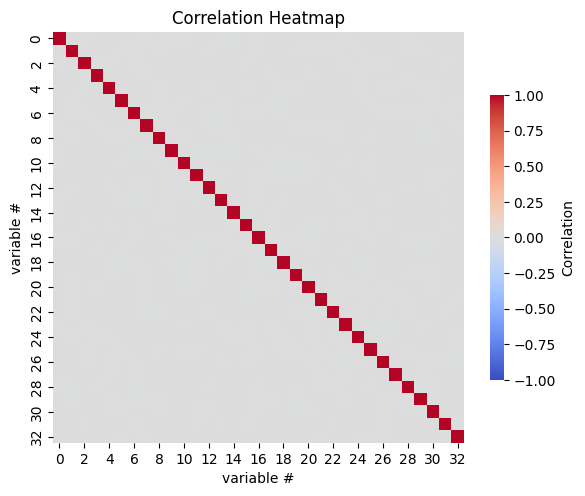

In [9]:
# heatmap of correlation coefficients among transformed variables
correlation_matrix_Scores = np.corrcoef(scores_train.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_Scores, 
            cmap='coolwarm',  # Color scheme (red for positive, blue for negative correlations)
            vmin=-1,  # Minimum correlation value
            vmax=1,   # Maximum correlation value
            center=0, # Center the colormap at 0
            square=True, # Make the plot square-shaped
            cbar_kws={
                'shrink': 0.5,  # height
                'label': 'Correlation',  # add label
            }) # Format correlation values to 2 decimal places

plt.xlabel('variable #'), plt.ylabel('variable #')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### Let's now see the variances captured by each PC

In [10]:
# get the eigenvalues or the variances of the different PC Scores
variances_captured = pca.explained_variance_
print('variances of the PC scores: ', variances_captured)

variances of the PC scores:  [6.423 5.529 5.218 2.576 1.949 1.655 1.424 1.275 1.03  1.005 0.865 0.839
 0.667 0.618 0.568 0.318 0.259 0.235 0.207 0.172 0.16  0.106 0.087 0.067
 0.051 0.044 0.038 0.032 0.023 0.021 0.015 0.008 0.   ]


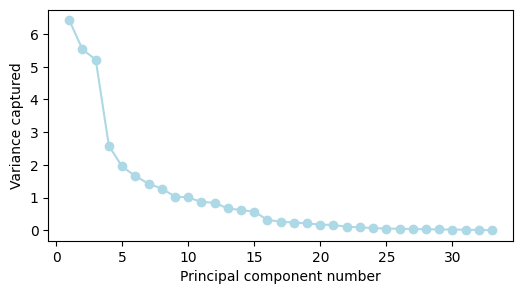

In [11]:
# visualize the variances 
plt.figure(figsize=(6,3))
plt.plot(range(1, len(variances_captured) + 1), variances_captured, color='lightblue', marker='o')
plt.xlabel('Principal component number'), plt.ylabel('Variance captured')
plt.show()

In [12]:
# ==================================================================================
#                   Find number of PCs to retain via CPV plot
# ==================================================================================

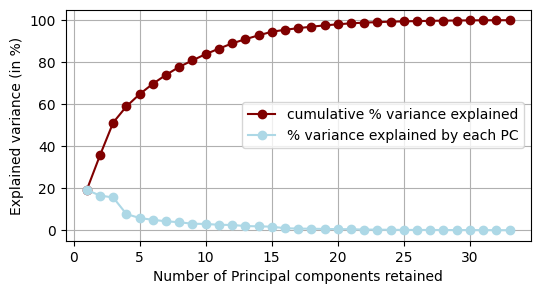

In [13]:
explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

plt.figure(figsize=(6,3))
plt.plot(range(1, len(variances_captured) + 1), cum_explained_variance, color='maroon', marker='o', label = 'cumulative % variance explained')
plt.plot(range(1, len(variances_captured) + 1), explained_variance, color='lightblue', marker='o', label = '% variance explained by each PC')
plt.ylabel('Explained variance (in %)')
plt.xlabel('Number of Principal components retained')
plt.legend()
plt.grid()
plt.show()

In [14]:
# decide # of PCs to retain
n_comp = np.argmax(cum_explained_variance >= 90) + 1
print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  13


In [15]:
# ==================================================================================
#                   Perform dimensionality reduction
# ==================================================================================

In [16]:
# compute reduced data in PC space
scores_train_reduced = scores_train[:,0:n_comp]
print('Shape of score matrix: ', scores_train_reduced.shape)

Shape of score matrix:  (69, 13)


##### Let's reconstruct the data using the reduced score matrix and visually confirm that only a small amount of data has been discarded or lost.

In [17]:
# ==================================================================================
#                               Reconstruct
# ==================================================================================

In [18]:
V_matrix = pca.components_.T
P_matrix = V_matrix[:,0:n_comp] 
data_train_normal_reconstruct = np.dot(scores_train_reduced, P_matrix.T)

print('Shape of reconstructed X (normalized) matrix: ', data_train_normal_reconstruct.shape)

Shape of reconstructed X (normalized) matrix:  (69, 33)


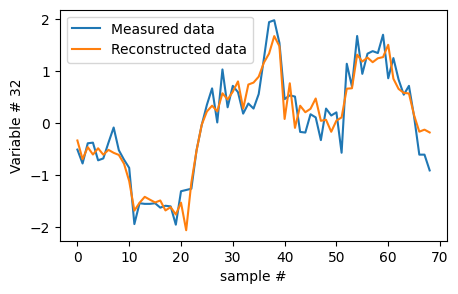

In [19]:
# plot to compare original and reconstructed variables
var = 32
plt.figure(figsize=(5,3))
plt.plot(data_train_normal[:,var],label = 'Measured data')
plt.plot(data_train_normal_reconstruct[:,var],label = 'Reconstructed data')
plt.ylabel('Variable # '+ str(var))
plt.xlabel('sample #')
plt.legend()
plt.show()

In [20]:
# ==================================================================================
#                Compute T-squared and Q statistics for training samples
# ==================================================================================

In [21]:
# calculate T2 for training data
lambda_k = np.diag(pca.explained_variance_[0:n_comp]) # eigenvalue = explained variance
lambda_k_inv = np.linalg.inv(lambda_k)

T2_train = np.zeros((data_train_normal.shape[0],))

for i in range(data_train_normal.shape[0]):
    T2_train[i] = np.dot(np.dot(scores_train_reduced[i,:], lambda_k_inv), scores_train_reduced[i,:].T)

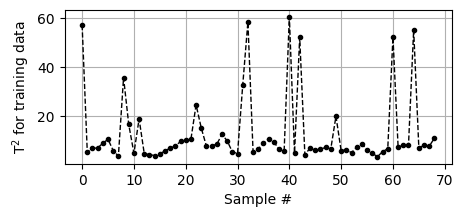

In [22]:
# plot T2_train  
plt.figure(figsize=(5,2))
plt.plot(T2_train, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.xlabel('Sample #'), plt.ylabel('T$^2$ for training data')
plt.grid()
plt.show()

In [23]:
# calculate Q for training data
error_train = data_train_normal - data_train_normal_reconstruct
Q_train = np.sum(error_train*error_train, axis = 1)

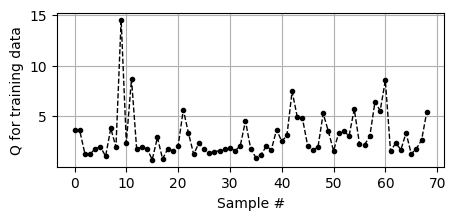

In [24]:
# plot Q_train  
plt.figure(figsize=(5,2))
plt.plot(Q_train, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.xlabel('Sample #'), plt.ylabel('Q for training data')
plt.grid()
plt.show()

In [25]:
# ==================================================================================
#          Compute control limits for T-squared and Q metrics 
# ==================================================================================

In [26]:
# T2_train control limit
T2_CL = np.percentile(T2_train, 99)

print('T-squared control limit: ', T2_CL)

T-squared control limit:  58.96752157797498


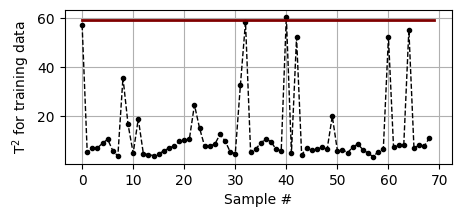

In [27]:
# plot T2_train with control limits
plt.figure(figsize=(5,2))
plt.plot(T2_train, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.plot([0,len(T2_train)],[T2_CL,T2_CL], color='maroon', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('T$^2$ for training data')
plt.grid()
plt.show()

In [28]:
# Q_train control limit
Q_CL = np.percentile(Q_train, 99)
print('Q control limit: ', Q_CL)

Q control limit:  10.54088875295394


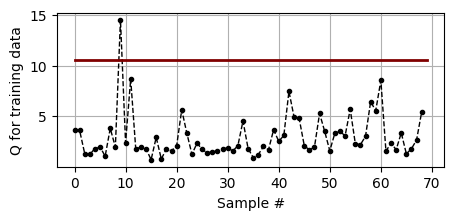

In [29]:
# plot Q_train with control limits
plt.figure(figsize=(5,2))
plt.plot(Q_train, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.plot([0,len(Q_train)],[Q_CL,Q_CL], color='maroon', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('Q for training data')
plt.grid()
plt.show()

In [30]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##              Perform fault detection check for test data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [31]:
# get test data, normalize it
data_test = data.iloc[69:,]
data_test_normal = scaler.transform(data_test) # using scaling parameters from training data

# compute scores
scores_test = pca.transform(data_test_normal)
scores_test_reduced = scores_test[:,0:n_comp]

# reconstruct
data_test_normal_reconstruct = np.dot(scores_test_reduced, P_matrix.T)

In [32]:
# calculate T2_test
T2_test = np.zeros((data_test_normal.shape[0],))

for i in range(data_test_normal.shape[0]):
    T2_test[i] = np.dot(np.dot(scores_test_reduced[i,:], lambda_k_inv), scores_test_reduced[i,:].T)

# calculate Q_test
error_test = data_test_normal_reconstruct - data_test_normal
Q_test = np.sum(error_test*error_test, axis = 1)

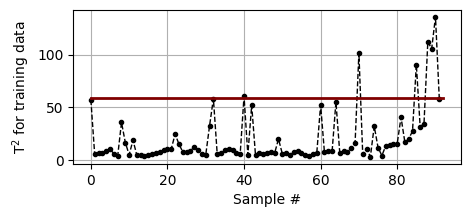

In [33]:
# plot T-squared control chart for the complete dataset
T2_combined = np.concatenate([T2_train,T2_test])

plt.figure(figsize=(5,2))
plt.plot(T2_combined, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.plot([0,len(T2_combined)],[T2_CL,T2_CL], color='maroon', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('T$^2$ for training data')
plt.grid()
plt.show()

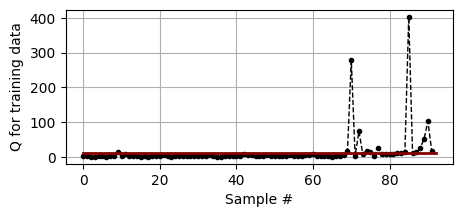

In [34]:
# plot SPE control chart for the complete dataset
Q_combined = np.concatenate([Q_train,Q_test])

plt.figure(figsize=(5,2))
plt.plot(Q_combined, color='black', linestyle='--', linewidth=1, marker='o', markersize=3)
plt.plot([0,len(Q_combined)],[Q_CL,Q_CL], color='maroon', linewidth=2)
plt.xlabel('Sample #'), plt.ylabel('Q for training data')
plt.grid()
plt.show()

In [35]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  fault isolation by contribution plots
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [36]:
sample = 85 - 69

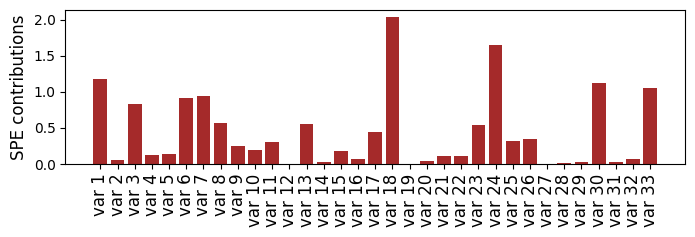

In [40]:
# SPE contribution plot
error_test_sample = error_test[sample-1,]
SPE_contri = error_test_sample*error_test_sample # vector of contributions

plt.figure(figsize=[8,2])
plt.bar(['var ' + str((i+1)) for i in range(len(SPE_contri))], SPE_contri, color='brown')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('SPE contributions', fontsize=12)
plt.show()

c:\Users\f0ne44\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\f0ne44\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


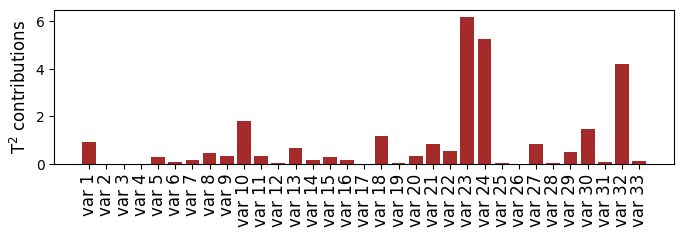

In [41]:
# T2 contribution plot
import scipy

data_point = np.transpose(data_test_normal[sample-1,])

D = np.dot(np.dot(P_matrix,lambda_k_inv), P_matrix.T)
T2_contri = np.dot(scipy.linalg.sqrtm(D), data_point)**2 # vector of contributions

plt.figure(figsize=[8,2])
plt.bar(['var ' + str((i+1)) for i in range(len(T2_contri))], T2_contri, color='brown')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('T$^2$ contributions', fontsize=12)
plt.show()

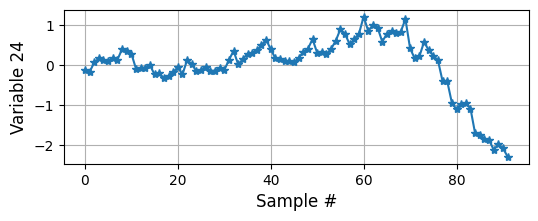

In [44]:
# variable plot
plt.figure(figsize=[6,2])
plt.plot(data.iloc[:,23], '-*')
plt.xlabel('Sample #', fontsize=12)
plt.ylabel('Variable 24', fontsize=12)
plt.grid()
plt.show()

In [ ]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  Save model for later use
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import pickle
PCAmodelData = {"PCAmodel": pca,
                               "scaler": scaler,
                               "n_comp": n_comp,
                               "P_matrix": P_matrix,
                               "lambda_k_inv": lambda_k_inv,
                                "Q_CL": Q_CL,
                                "T2_CL": T2_CL} # dictionary data structure uses key-value pairs

with open('PCAmodelData.pickle', 'wb') as f:
    pickle.dump(PCAmodelData, f)